1.7320508100147276
   n        x0        x1     f(x0)    f'(x0)         f(x1)
0  1  1.000000  2.000000 -2.000000  2.000000  1.000000e+00
1  2  2.000000  1.750000  1.000000  4.000000  6.250000e-02
2  3  1.750000  1.732143  0.062500  3.500000  3.188776e-04
3  4  1.732143  1.732051  0.000319  3.464286  8.472674e-09


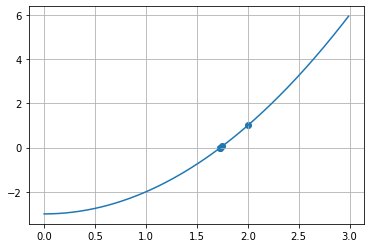

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def func(x):
    return x**2-3
def func_dash(x):
    return 2*x

x0 = 1
tol = 1*10**(-4)

x0_list = []
x1_list = []
if -tol > func(x0) > tol:
    x_ans = x0
    print(f'{x_ans}(input)')
else:
    x1 = x0 - func(x0)/func_dash(x0)
    x0_list.append(x0)
    x1_list.append(x1)
    while -tol > func(x1) or func(x1) > tol:
        x0 = x1
        x1 = x0 - func(x0)/func_dash(x0)
        x0_list.append(x0)
        x1_list.append(x1)
        
    x_ans = x1
    print(x_ans)
    
    n = np.arange(1,len(x0_list)+1)
    fx0_list = [func(x) for x in x0_list]
    fx1_list = [func(x) for x in x1_list]
    fx0_dash_list = [func_dash(x) for x in x0_list]
    data = {'n':n,'x0':x0_list,'x1':x1_list,
            'f(x0)':fx0_list,'f\'(x0)':fx0_dash_list,'f(x1)':fx1_list}
    table = pd.DataFrame(data)
    print(table)
    y_list = [func(x) for x in x1_list]
    plt.scatter(x1_list,y_list)
    min_x = min(min(x0_list),min(x1_list))-1
    max_x = max(max(x0_list),max(x1_list))+1
    x = np.arange(min_x,max_x,0.01)
    plt.plot(x, [func(x) for x in x])
    plt.grid(True)
    plt.show()